<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [17]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [18]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats 
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [19]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [20]:
boston_df=pd.read_csv(boston_url)

In [21]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## **Descriptive Statistics and Visualizations**

### **Median value of owner-occupied homes**

<AxesSubplot:xlabel='MEDV'>

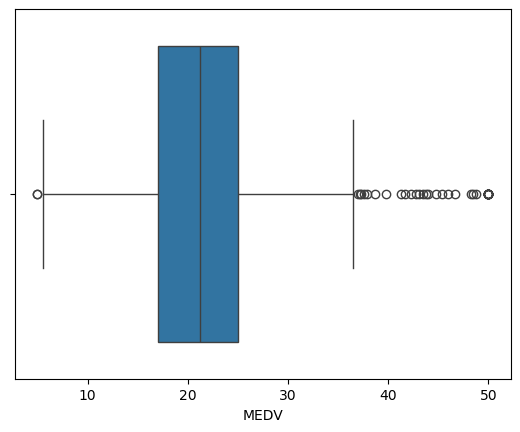

In [22]:
sns.boxplot(x='MEDV', data=boston_df)

### **Charles River dummy variable**

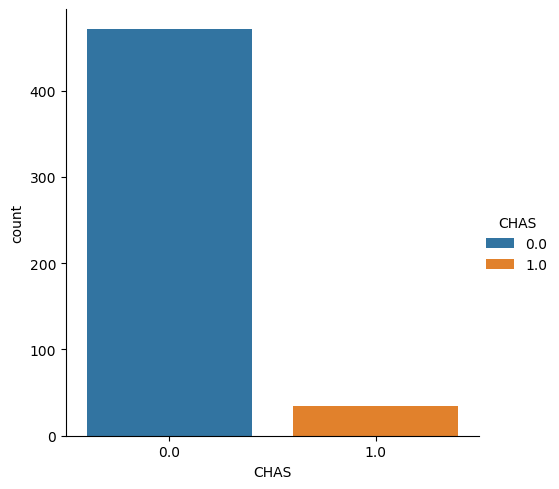

In [23]:
sns.catplot(x='CHAS', kind='count', hue='CHAS', data=boston_df)

(1 if tract bounds river; 0 otherwise)

### **MEDV variable vs the AGE variable**

<AxesSubplot:xlabel='age_group', ylabel='MEDV'>

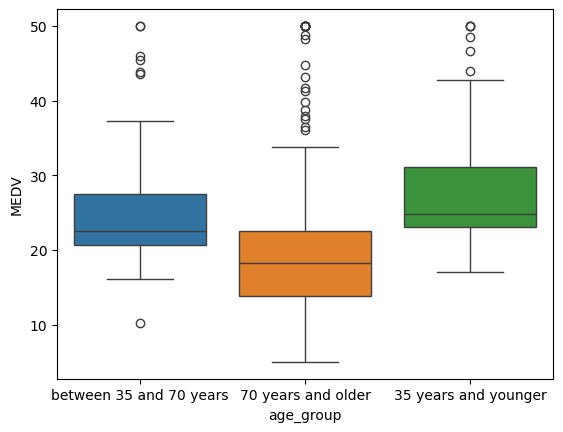

In [24]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

sns.boxplot(x='age_group', y='MEDV', data=boston_df, hue='age_group')


 ### **Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town**

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

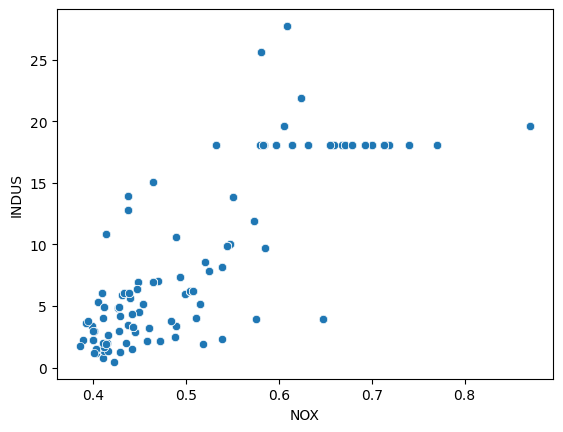

In [25]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

### **Pupil to teacher ratio**

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

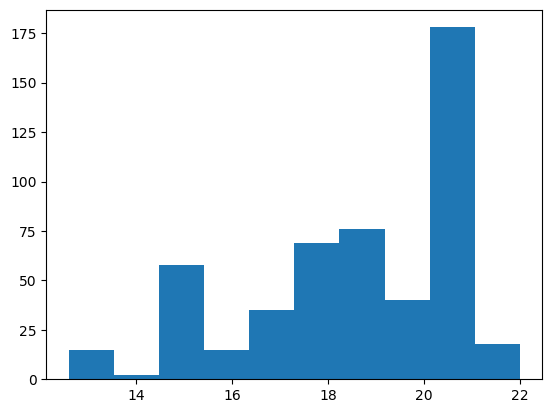

In [26]:
pyplot.hist(boston_df['PTRATIO'])

## **Hypothesis Testing**

### **Is there a significant difference in median value of houses bounded by the Charles river or not?**

Hypothesis:

-   $H_0: µ_1 = µ_2$ ("there is no difference in median value of houses bounded by the Charles river")
-   $H_1: µ_1 ≠ µ_2$ ("there is a difference in median value of houses bounded by the Charles river")

In [27]:
# Levene's test   
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0] ['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], 
                   center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [28]:
# Levene's test above is signfiicant (i.e. equality of variance cannot be assumed)
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0] ['MEDV'],
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], 
                      equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:** Since the p-value=0.004 is less than 0.05, reject the null hypothesis and conclude that there is a significant difference in median value of houses bounded by the Charles river or not.

### **Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?** 

Hypothesis:

-   $H_0: µ_1 = µ_2 = µ_3$ (all the the means are equal)
-   $H_1:$ At least one of the means is different from the others

In [29]:
# Levene's test   
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger'] ['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [30]:
# Levene's test above is not signfiicant (i.e. equality of variance assumed)

scipy.stats.f_oneway(boston_df[boston_df['age_group'] == '35 years and younger'] ['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'])


F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

**Conclusion:** Since the p-value < 0.05, reject the null hypothesis and conclude that there is a significant difference in median value of houses for each proportion of owner occupied units built prior to 1940.

### **Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?**

Hypothesis:

-   $H_0:$ There is no relationship between the two variables
-   $H_1:$ There is a relationship between the two variables

In [31]:
scipy.stats.pearsonr(boston_df['NOX'] , boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:** Since the p-value < 0.05, reject the null hypothesis and conclude that there is a relationship between nitric oxide concentrations and proportion of non-retail business acres per town.

### **What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?** 

Hypothesis:

-   $H_0:$ DIS does not have an impact on MEDV
-   $H_1:$ DIS has an impact on MEDV

In [32]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        11:04:42   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p-value < 0.05, reject  the Null hypothesis and conclude that there is a relationship between  DIS and MEDV.